In [1]:
install.packages('igraph')
install.packages('Matrix')
install.packages('pracma')

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpwtTicX\downloaded_packages
package 'Matrix' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpwtTicX\downloaded_packages
package 'pracma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpwtTicX\downloaded_packages


In [2]:
library('igraph')
library('Matrix')
library('pracma')b

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'Matrix' was built under R version 3.6.3"Warning message:
"package 'pracma' was built under R version 3.6.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



# Part1 Generating Random Networks

## Part1_1 Create random networks using Erd¨os-R´enyi (ER) model

### 1_1_a

[1] "practical  : n=1000, ps= 0.003  --- mean is : 2.974 , variance is : 3.09842242242242"
[1] "theoretical: n=1000, ps= 0.003  --- mean is : 2.997 , variance is : 2.988009"
[1] "practical  : n=1000, ps= 0.004  --- mean is : 3.912 , variance is : 4.0402962962963"
[1] "theoretical: n=1000, ps= 0.004  --- mean is : 3.996 , variance is : 3.980016"
[1] "practical  : n=1000, ps= 0.01  --- mean is : 9.888 , variance is : 9.47092692692693"
[1] "theoretical: n=1000, ps= 0.01  --- mean is : 9.99 , variance is : 9.8901"
[1] "practical  : n=1000, ps= 0.05  --- mean is : 50.104 , variance is : 50.6498338338338"
[1] "theoretical: n=1000, ps= 0.05  --- mean is : 49.95 , variance is : 47.4525"
[1] "practical  : n=1000, ps= 0.1  --- mean is : 99.88 , variance is : 87.1467467467467"
[1] "theoretical: n=1000, ps= 0.1  --- mean is : 99.9 , variance is : 89.91"


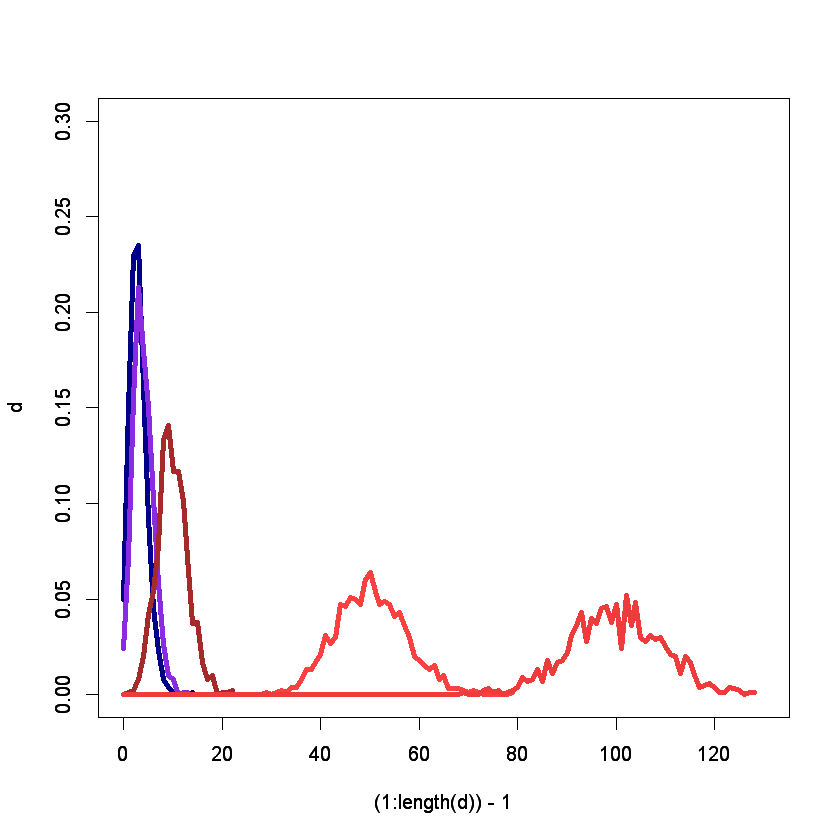

In [227]:
ps <- c(0.003, 0.004, 0.01, 0.05, 0.1)
gs <- list()
for(i in 1:length(ps)){
    g <- sample_gnp(n=1000, p=ps[i], directed = FALSE, loops = FALSE)
    e <- mean(degree(g))
    v <- var(degree(g))
    print(paste('practical  : n=1000, ps=',ps[i], ' --- mean is :', e, ', variance is :', v))
    print(paste('theoretical: n=1000, ps=',ps[i], ' --- mean is :', 999*ps[i], ', variance is :', 999*ps[i]*(1-ps[i])))
    d <- degree_distribution(g)
    plot((1:length(d))-1, d, type='l',xlim=c(0,130), ylim=range(0,0.3), col=colors()[i+29],lwd = 4)
    par(new = TRUE)
    gs[[i]] <- g
}


### 1_1_b

In [228]:
for(i in 1:length(ps)){
    print(paste('n=1000, ps=', ps[i], 
                ', connections: ', is_connected(gs[[i]]), 
                ', GCC size:', max(components(gs[[i]])$csize),
                ', diameter: ', diameter(gs[[i]])))
}

[1] "n=1000, ps= 0.003 , connections:  FALSE , GCC size: 944 , diameter:  14"
[1] "n=1000, ps= 0.004 , connections:  FALSE , GCC size: 972 , diameter:  11"
[1] "n=1000, ps= 0.01 , connections:  TRUE , GCC size: 1000 , diameter:  6"
[1] "n=1000, ps= 0.05 , connections:  TRUE , GCC size: 1000 , diameter:  3"
[1] "n=1000, ps= 0.1 , connections:  TRUE , GCC size: 1000 , diameter:  3"


### 1_1_c

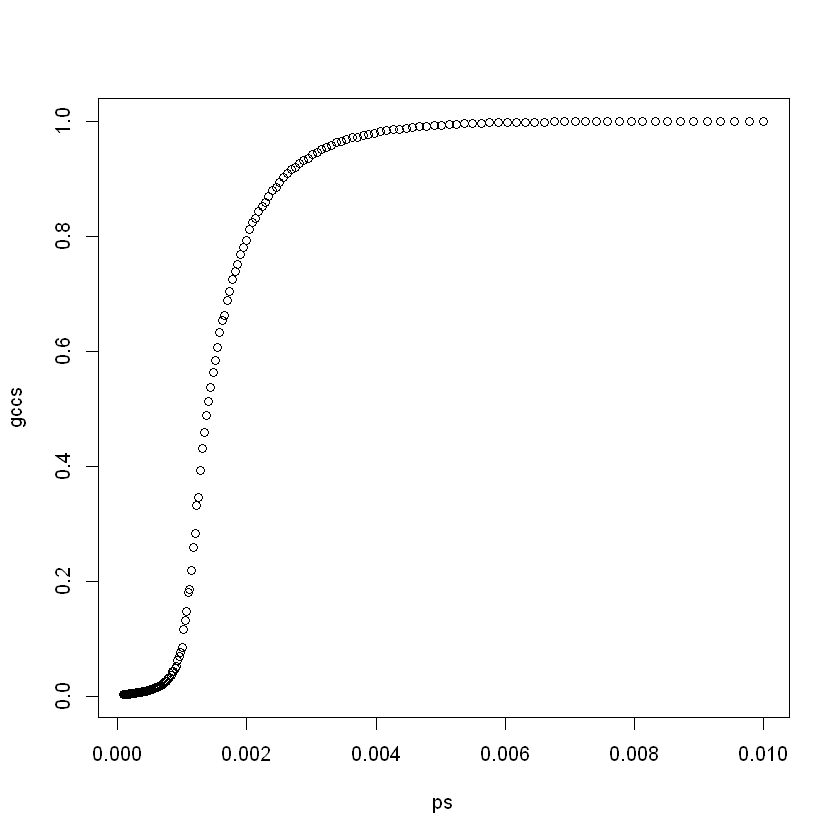

In [229]:
n <- 200
ps <- 10^(- 4 + (1:n)/100)
gccs <- ps*0
for(i in 1:n){
    tmp_gcc = zeros(1,100)
    for(j in 1:100){
        g <- sample_gnp(n=1000, p=ps[i], directed = FALSE, loops = FALSE)
        tmp_gcc[j] <- max(components(g)$csize)
    }
    gccs[i] <- mean(tmp_gcc)/1000
}
plot(ps, gccs)

In [230]:
ps[gccs>0.1][1]

[1] 0.001023293

In [231]:
ps[gccs>0.99][1]

[1] 0.004677351

### 1_1_d

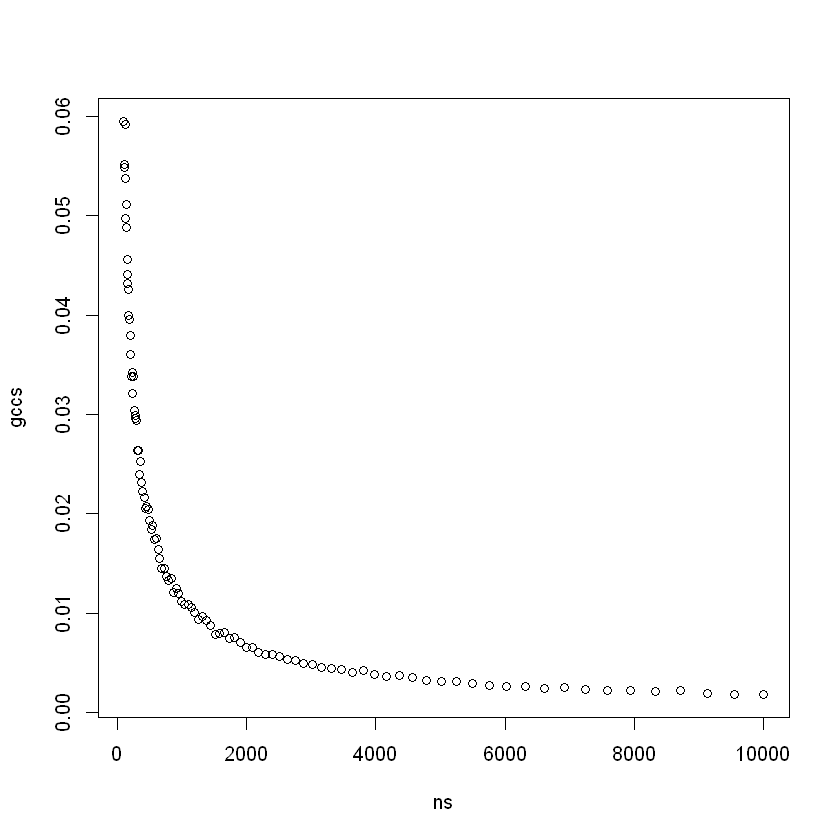

In [155]:
c <- 0.5
ns <- 10^(2+(1:100)/50)
gccs <- ns*0
for(i in 1:100){
    pp <- c/ns[i]
    tmp_gcc = zeros(1,100)
    for(j in 1:100){
        g <- sample_gnp(n=ns[i], p=pp, directed = FALSE, loops = FALSE)
        tmp_gcc[j] <- max(components(g)$csize)/ns[i]
    }
    gccs[i] <- mean(tmp_gcc)
}
plot(ns, gccs)

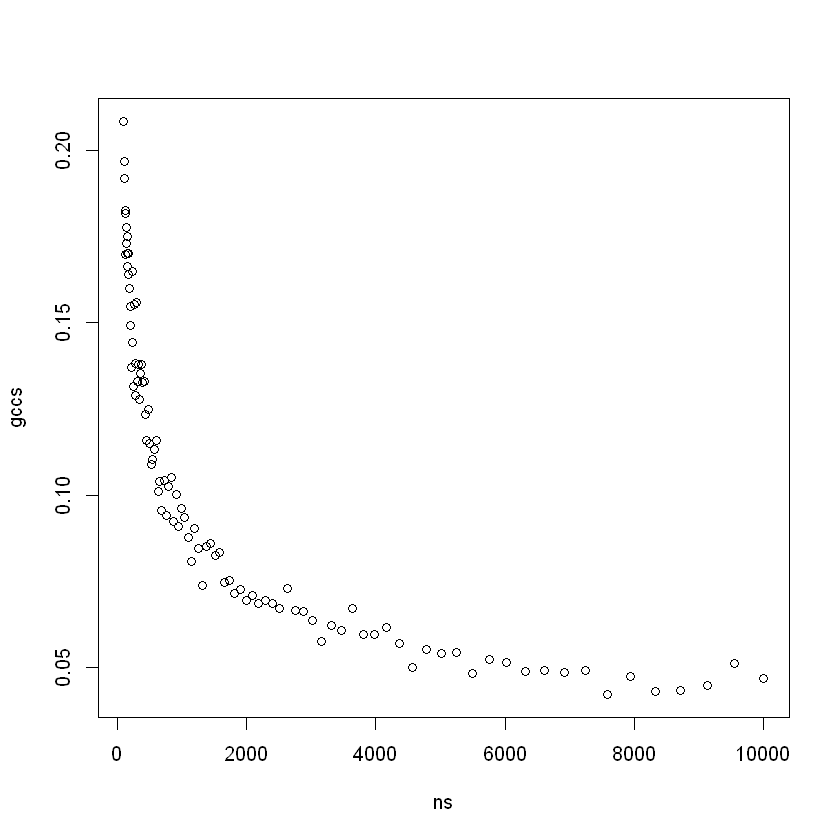

In [160]:
c <- 1
ns <- 10^(2+(1:100)/50)
gccs <- ns*0
for(i in 1:100){
    pp <- c/ns[i]
    tmp_gcc = zeros(1,100)
    for(j in 1:100){
        g <- sample_gnp(n=ns[i], p=pp, directed = FALSE, loops = FALSE)
        tmp_gcc[j] <- max(components(g)$csize)/ns[i]
    }
    gccs[i] <- mean(tmp_gcc)
}
plot(ns, gccs)

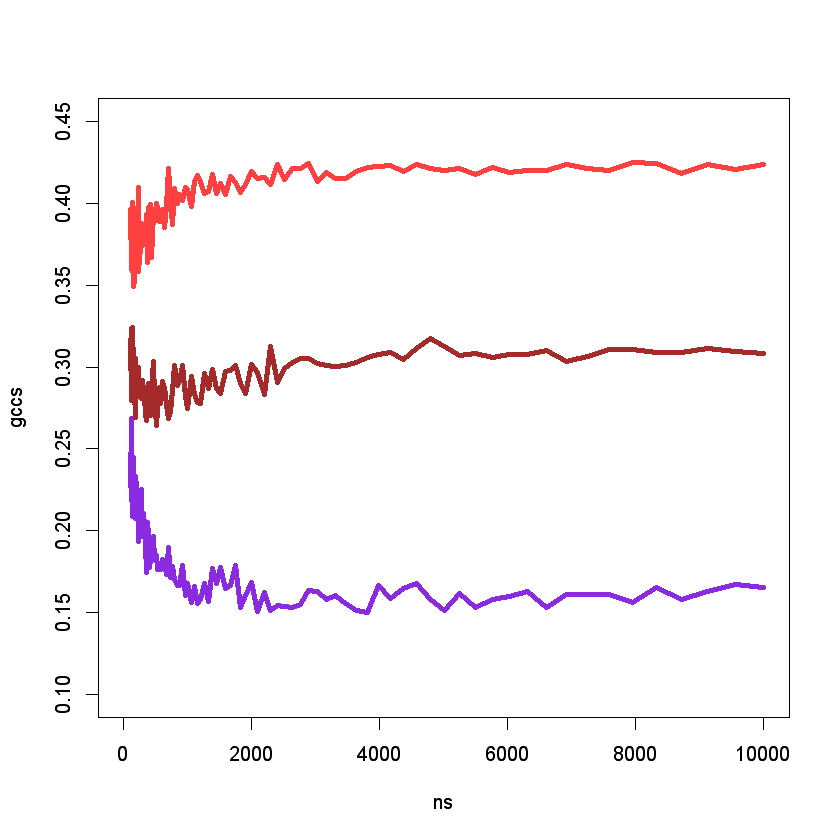

In [157]:
cs <- c(1.1,1.2,1.3)
for(k in 1:3){
    ns <- 10^(2+(1:100)/50)
    gccs <- ns*0
    for(i in 1:100){
        pp <- cs[k]/ns[i]
        tmp_gcc = zeros(1,100)
        for(j in 1:100){
            g <- sample_gnp(n=ns[i], p=pp, directed = FALSE, loops = FALSE)
            tmp_gcc[j] <- max(components(g)$csize)/ns[i]
        }
        gccs[i] <- mean(tmp_gcc)
    }
    plot(ns, gccs, type='l',xlim=c(0,10000), ylim=range(0.1,0.45), col=colors()[k+30],lwd = 4)
    par(new = TRUE)
}

## Part1_2 Create networks using preferential attachment model

### 1_2_a

In [188]:
tmp_conc = zeros(1,100)
for(i in 1:100){
    g<-sample_pa(n=1000,m=1,directed=F)
    tmp_conc[i] <- is_connected(g)
}
mean(tmp_conc)

[1] 1

### 1_2_b

In [190]:
g1 <- sample_pa(n=1000,m=1,directed=F)
modularity(g1, cluster_fast_greedy(g1)$membership)

[1] 0.9273758

### 1_2_c

In [191]:
tmp_conc = zeros(1,100)
for(i in 1:100){
    g<-sample_pa(n=10000,m=1,directed=F)
    tmp_conc[i] <- is_connected(g)
}
mean(tmp_conc)

[1] 1

In [192]:
g2 <- sample_pa(n=10000,m=1,directed=F)
modularity(g2, cluster_fast_greedy(g2)$membership)

[1] 0.9782636

### 1_2_d

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"37 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"24 y values <= 0 omitted from logarithmic plot"

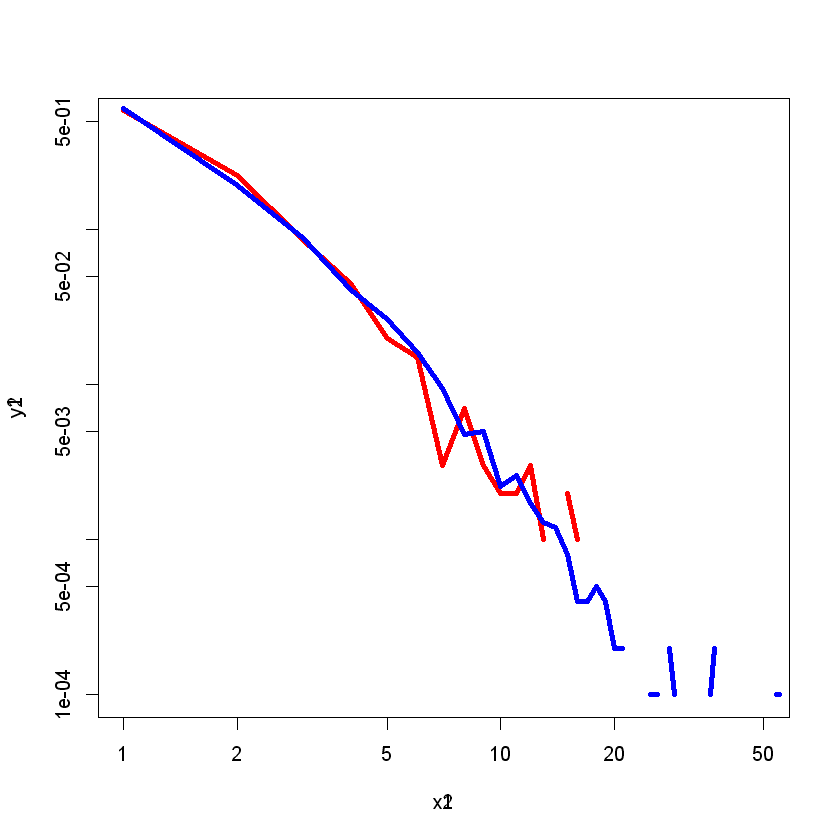

In [265]:
y1 = degree_distribution(g1)
x1 = (1:length(y1))-1
y2 = degree_distribution(g2)
x2 = (1:length(y2))-1

plot(x1,y1,log = 'xy', type='l', xlim=c(1,50), ylim=c(0.0001, 0.5), col='red',lwd = 4)
par(new = TRUE)
plot(x2,y2,log = 'xy', type='l', xlim=c(1,50), ylim=c(0.0001, 0.5), col='blue',lwd = 4)

In [266]:
x = log10(x1[y1>0])
y = log10(y1[y1>0])
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    -0.3891      -1.9480  


In [267]:
x = log10(x2[y2>0])
y = log10(y2[y2>0])
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
   -0.01642     -2.56509  


### 1_2_e